In [2]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings

#For plotting styles
import sys
PlottingFormat_Folder = '/Users/seetha/Box Sync/NoReward/Scripts/PlottingTools/'
sys.path.append(PlottingFormat_Folder)
import plottingfunctions as pf

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Import behavior data from all animals

In [3]:
from LickData import LickBehavior as l
#Just select tasks to plot for now
task_dict = {'Task1':'Reward', 'Task2':'No Reward', 'Control':'Control'}
colors_dict = {'Task1':'#2c7bb6', 'Task2':'#d7191c', 'Control':'#a6dba0'}

In [10]:
ExperimentFolderName = '/Users/seetha/Box Sync/NoReward/ImagingData/Good_behavior_suite2p/'
ExperimentAnimals = ['NR6', 'NR15','NR14', 'NR21', 'NR23' ]
ControlFolderName = '/Users/seetha/Box Sync/NoReward/ControlData/'
ControlAnimals = ['CFC3', 'CFC4']
SaveFigureFolder = '/Users/seetha/Box Sync/NoReward/FiguresforPaper'

In [11]:
A = l(ExpFolderName=ExperimentFolderName, ExpAnimals=ExperimentAnimals, 
      ControlFolderName=ControlFolderName, ControlAnimals=ControlAnimals,
      TaskDict=task_dict, TaskColors=colors_dict)

### Plot behavior data for a sample animal

In [26]:
data = np.load(os.path.join(ExperimentFolderName, 'CFC4', 'SaveAnalysed', 'behavior_data.npz'),
              allow_pickle=True)

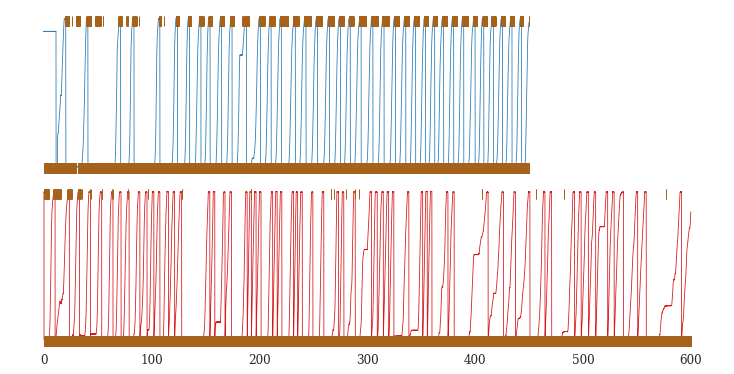

In [12]:
pf.set_style()
width = 200
taskdict = [i for i in task_dict.keys() if i not in 'Control']
# fig, ax = plt.subplots(2, 1, figsize=pf.set_size(width, fraction=0.8), sharex='all', sharey='all')
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex='all', sharey='all')
for n, t in enumerate(taskdict):
    if t=='Task2':
        r = data['running_data'].item()[t]
        l = data['lick_data'].item()[t]>1
    else:
        r = data['running_data'].item()[t]
        l = data['lick_data'].item()[t]>1
    x = np.linspace(0, np.size(r)*0.03, np.size(r))    
    ax[n].plot(x, r , color=colors_dict[t], linewidth=0.8)
    ax[n].plot(x, l*0.6, '|', color='#a6611a', linewidth=0.8, markersize=10)
    ax[n].set_yticklabels([])
    ax[n].locator_params(axis='x', nbins=10)
    pf.set_axes_style(ax[n], numticks=4)

fig.tight_layout(pad=0)
fig.savefig(os.path.join(SaveFigureFolder, 'Samplerunningdata.pdf'), bbox_inches='tight', dpi=500)

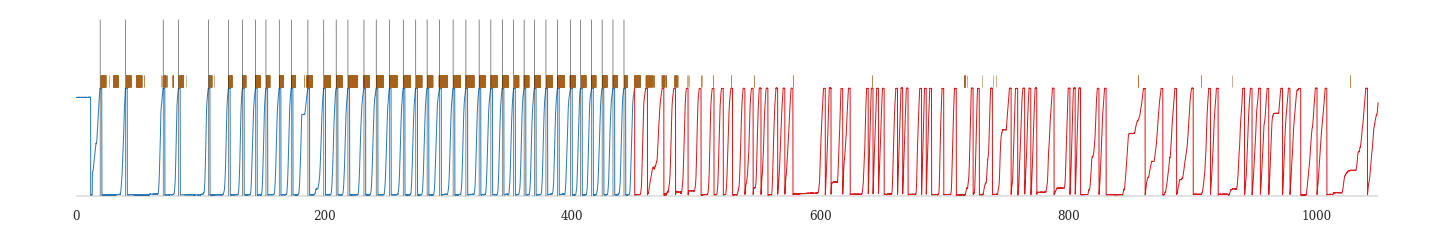

In [43]:
pf.set_style()
width = 500
taskdict = [i for i in task_dict.keys() if i not in 'Control']
fig, ax = plt.subplots(1, 1, figsize=(20, 3), sharex='all', sharey='all')

x1 = 0
for n, t in enumerate(taskdict):
    if t=='Task2':
        r = data['running_data'].item()[t]
    else:
        r = data['running_data'].item()[t]
    l = (data['lick_data'].item()[t] > 1)*0.65
    rew = (data['reward_data'].item()[t] > 1)
    l[l==0] =np.nan
#     l_good_frames = l[data['good_running_index'].item()[t]]*0.6
#     l_good_frames[l_good_frames==0] = np.nan
    x = np.linspace(x1, x1+np.size(r)*0.03, np.size(r))
    x1 += x[-1]
    ax.plot(x, r , color=colors_dict[t], linewidth=1)
    ax.plot(x, l, '|', color='#a6611a', alpha=0.5, markersize=12, linewidth=0.5)
    ax.plot(x, rew,  color='k', alpha=0.5,  linewidth=0.5)

ax.set_yticklabels([])

ax.locator_params(axis='x', nbins=10)
pf.set_axes_style(ax, numticks=4)
# ax.set_xlim((200, 700))
fig.tight_layout(pad=0)
fig.savefig(os.path.join(SaveFigureFolder, 'SampleGoodrunningdata.pdf'), bbox_inches='tight', dpi=500)

In [37]:
data['licks_bytimefromreward'].item()['Task1'][0, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0.

### Multiple plots on licking behavior

#### Plot amount of licks around reward zone in the tasks

In [28]:
x1 = A.gatherlickdata(data_key='licks_bytimefromreward')

Loading.. NR6
Loading.. NR15
Loading.. NR14
Loading.. NR21
Loading.. NR23


0.7094239094239094
0.09045454545454545


TypeError: set_axes_style() takes 1 positional argument but 2 were given

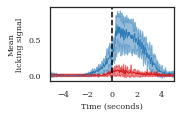

In [29]:
pf.set_style()
width = 200
for i in [False, True]:
    fig, ax = plt.subplots(1, 1, figsize=pf.set_size(width, fraction=0.8))
    A.plotlickdataaroundreward(x1, ax, withcontrol=i)
    pf.set_axes_style(ax, 3)
    fig.tight_layout(pad=0)
#     fig.savefig(os.path.join(SaveFigureFolder, f'LickAroundReward_withcontrol_%s.pdf' %i), bbox_inches='tight', dpi=500)

#### Plot licks in space

In [21]:
x2 = A.gatherlickdata(data_key='numlicks_perspatialbin')

Loading.. NR6
Loading.. NR15
Loading.. NR14
Loading.. NR21
Loading.. NR23
Loading.. CFC3
Loading.. CFC4


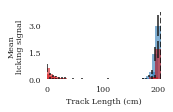

In [22]:
pf.set_style()
width = 200
fig, ax = plt.subplots(1, 1, figsize=pf.set_size(width, fraction=0.8))
A.plotlickbyspace(x2, ax)
pf.set_axes_style(ax, 3)
fig.tight_layout(pad=0)
fig.savefig(os.path.join(SaveFigureFolder, 'LicksinSpace.pdf'), bbox_inches='tight', dpi=500)

#### Plot licks per lap

In [29]:
x3 = A.getlicksperlap()

Loading.. NR6
Loading.. NR15
Loading.. NR14
Loading.. NR21
Loading.. NR23


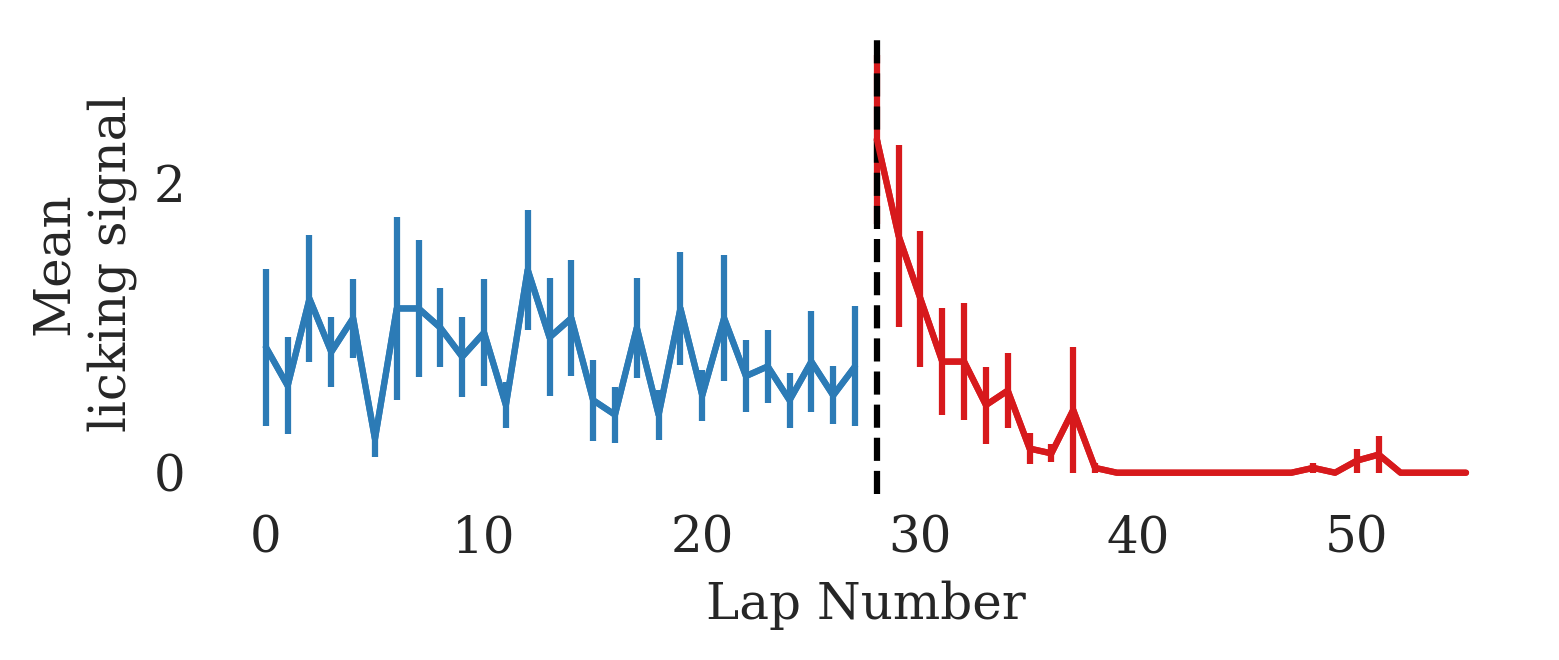

In [42]:
pf.set_style()
width = 400
fig, ax = plt.subplots(1, 1, figsize=(5, 2), dpi=300)
# fig, ax = plt.subplots(1, figsize=(10, 3))
A.plot_licksperlap(x3, ax)
pf.set_axes_style(ax, numticks=2)
fig.tight_layout(pad=0)
# fig.savefig(os.path.join(SaveFigureFolder, 'Licksbylaps.pdf'), bbox_inches='tight', dpi=500)